# This is a notebook for analyzing funder transactions from the Candid API


1. Change your Google Colab Type to GPU or run this through a Windows
environment with TensorFlow and sentence transformers installed
2. Load your Transactions Txt output file into the root folder with the notebook
3. Run all

Have fun exploring the data


# First we will view the data so we can check that it came in ok.

Remember to update the file path with the correct path to the Transactions.

In [1]:
# Loading the JSON file to understand its structure

import json

# Define the path to the file
file_path = 'RWJF_Trans.txt'

# Read the JSON content
with open(file_path, 'r') as file:
    content = json.load(file)

# Check if the "data.rows" key exists and display a snippet of the content
data_rows = content['data']['rows'] if 'data' in content and 'rows' in content['data'] else None
data_rows[:2] if data_rows else "data.rows key not found"

[{'funder_key': 'JOHN015',
  'funder_profile_url': 'https://fconline.foundationcenter.org/fdo-grantmaker-profile?key=JOHN015',
  'funder_name': 'The Robert Wood Johnson Foundation',
  'funder_city': 'Princeton',
  'funder_state': 'NJ',
  'funder_country': 'United States',
  'funder_type': 'Independent foundations',
  'funder_zipcode': '08540-6614',
  'funder_country_code': '6252001',
  'funder_ein': '22-6029397',
  'funder_gs_profile_update_level': None,
  'recip_key': '373250',
  'recip_name': 'University of Wisconsin System',
  'recip_city': 'Milwaukee',
  'recip_state': 'WI',
  'recip_country': 'United States',
  'recip_zipcode': '53211-3153',
  'recip_country_code': '6252001',
  'recip_ein': '39-6006492',
  'recip_organization_code': 'EB020000',
  'recip_organization_tran': 'State or provincial governments and agencies',
  'recip_gs_profile_link': 'https://www.guidestar.org/Profile/39-6006492',
  'recip_gs_profile_update_level': None,
  'grant_key': 'hgrant-transaction-245492',
  '

# Get the data into a dataframe and view the first few rows

In [2]:
# Importing necessary libraries
import pandas as pd

# Converting the JSON data into a DataFrame
grant_data_df = pd.DataFrame(data_rows)

#Turning off the max columns limit
pd.set_option('display.max_columns', None)

# Displaying the first few rows of the DataFrame to confirm the transformation
grant_data_df.head()

,funder_key,funder_profile_url,funder_name,funder_city,funder_state,funder_country,funder_type,funder_zipcode,funder_country_code,funder_ein,funder_gs_profile_update_level,recip_key,recip_name,recip_city,recip_state,recip_country,recip_zipcode,recip_country_code,recip_ein,recip_organization_code,recip_organization_tran,recip_gs_profile_link,recip_gs_profile_update_level,grant_key,amount_usd,grant_subject_code,grant_subject_tran,grant_population_code,grant_population_tran,grant_strategy_code,grant_strategy_tran,grant_transaction_code,grant_transaction_tran,grant_geo_area_code,grant_geo_area_tran,year_issued,grant_duration,grant_description,last_updated
0,JOHN015,https://fconline.foundationcenter.org/fdo-gran...,The Robert Wood Johnson Foundation,Princeton,NJ,United States,Independent foundations,08540-6614,6252001,22-6029397,None,373250,University of Wisconsin System,Milwaukee,WI,United States,53211-3153,6252001,39-6006492,EB020000,State or provincial governments and agencies,https://www.guidestar.org/Profile/39-6006492,None,hgrant-transaction-245492,22300000.0,SE020000; SH000000; SE130000,Health care access; Information and Communicat...,PJ050000,Academics,UN0000; UK0700; UJ0000; UH0100; UM0100; UD0000...,Program support; Equal access; Network-buildin...,TA00,Cash grants,6252001,United States,2023,36.00,To support (1) the production of three annual ...,2023-07-28 16:31:44.000
1,JOHN015,https://fconline.foundationcenter.org/fdo-gran...,The Robert Wood Johnson Foundation,Princeton,NJ,United States,Independent foundations,08540-6614,6252001,22-6029397,None,3671487,"Community Catalyst, Inc.",Boston,MA,United States,02110-2012,6252001,04-3355127,EA040000,Public charities,https://www.guidestar.org/Profile/04-3355127,None,hgrant-transaction-259877,18900000.0,SE130000,Public health,None,None,UN0000,Program support,TA00,Cash grants,6252001,United States,2023,36.00,To provide funds to Community Catalyst to serv...,2023-07-28 16:31:08.000
2,JOHN015,https://fconline.foundationcenter.org/fdo-gran...,The Robert Wood Johnson Foundation,Princeton,NJ,United States,Independent foundations,08540-6614,6252001,22-6029397,None,3671487,"Community Catalyst, Inc.",Boston,MA,United States,02110-2012,6252001,04-3355127,EA040000,Public charities,https://www.guidestar.org/Profile/04-3355127,None,hgrant-transaction-258959,11890000.0,SE020000; SE030300; SE030500,Health care access; Health care financing; Hea...,PE000000,Ethnic and racial groups,UN0000; UH0100; UK0700,Program support; Public engagement and educati...,TA00,Cash grants,6252001,United States,2023,24.00,To (1) protect and expand access to Medicaid a...,2023-07-28 16:31:43.000
3,JOHN015,https://fconline.foundationcenter.org/fdo-gran...,The Robert Wood Johnson Foundation,Princeton,NJ,United States,Independent foundations,08540-6614,6252001,22-6029397,None,5073972,NEW YORK UNIVERSITY,New York City,NY,United States,10012-1119,6252001,13-5562308,EA040000,Public charities,https://www.guidestar.org/Profile/13-5562308,None,hgrant-transaction-258814,7979556.0,SE130000; SE020000; SN020000; SH050000,Public health; Health care access; Economic de...,PJ050000,Academics,UM0400; UN0000; UF0000,Data and measurement systems; Program support;...,TA00,Cash grants,6252001,United States,2023,24.00,To (1) continue to maintain and improve upon t...,2023-07-28 16:31:04.000
4,JOHN015,https://fconline.foundationcenter.org/fdo-gran...,The Robert Wood Johnson Foundation,Princeton,NJ,United States,Independent foundations,08540-6614,6252001,22-6029397,None,986286,Third Sector New England Inc,Boston,MA,United States,02111-2679,6252001,04-2261109,None,None,https://www.guidestar.org/Profile/04-2261109,None,hgrant-transaction-274316,6998400.0,SG000000; SE020000; SJ040000; SE130602,Social sciences; Health care access; Legal ser...,None,None,UN0000; UK0700; UD0000,Program support; Equal access; Capacity-buildi...,TA00,Cash grants,6252001,United States,2023,24.00,"To (1) provide legal guidance, including legal...",2023-07-28 16:31:

# Pivot analysis for funder details: Summarizing the total grant amount by funder type and state

In [3]:
# Grouping the data by funder type and state and summing the grant amounts
funder_pivot = grant_data_df.groupby(['funder_type', 'funder_state'])['amount_usd'].sum().reset_index()

# Creating a pivot table to display the summarized data
funder_pivot_table = funder_pivot.pivot(index='funder_type', columns='funder_state', values='amount_usd').fillna(0)

# Displaying the pivot table
funder_pivot_table.head()

funder_state,NJ
funder_type,
Independent foundations,125413198.0


# Pivot analysis for recipient details: Summarizing the total grant amount by recipient state and organization type

In [4]:
# Grouping the data by recipient state and organization type and summing the grant amounts
recipient_pivot = grant_data_df.groupby(['recip_state', 'recip_organization_tran'])['amount_usd'].sum().reset_index()

# Creating a pivot table to display the summarized data
recipient_pivot_table = recipient_pivot.pivot(index='recip_state', columns='recip_organization_tran', values='amount_usd').fillna(0)

# Displaying the pivot table
recipient_pivot_table.head()

recip_organization_tran,Associations; Individual membership associations; Public charities,Non-governmental organizations,Public charities,Public charities; Supporting organizations (general),Schools; State or provincial governments and agencies,State or provincial governments and agencies
recip_state,,,,,,
CA,0.0,4750000.0,10025000.0,0.0,1989000.0,0.0
CT,0.0,0.0,2250000.0,0.0,0.0,0.0
DC,4513326.0,0.0,21332640.0,0.0,0.0,0.0
GA,0.0,0.0,0.0,6307276.0,0.0,0.0
MA,0.0,0.0,30790000.0,0.0,0.0,0.0


# Start visualizing the data by looking at amount per year

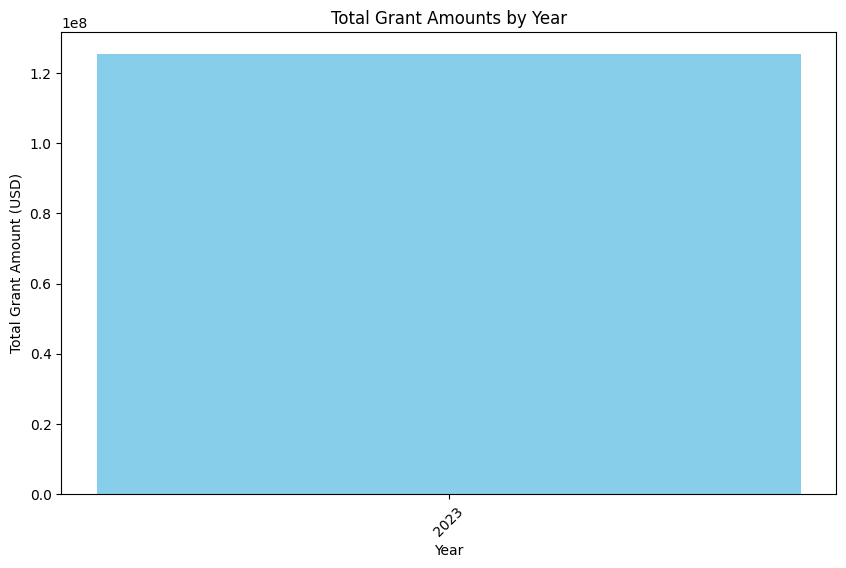

In [5]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt

# Grouping the data by year and summing the grant amounts
grant_amounts_by_year = grant_data_df.groupby('year_issued')['amount_usd'].sum().reset_index()

# Plotting the total grant amounts by year
plt.figure(figsize=(10, 6))
plt.bar(grant_amounts_by_year['year_issued'], grant_amounts_by_year['amount_usd'], color='skyblue')
plt.title('Total Grant Amounts by Year')
plt.xlabel('Year')
plt.ylabel('Total Grant Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Wordcloud View of Grant Subjects
NOTE- If you are not on Colab, you may need to pip install word cloud.  If using conda bash: conda install -c conda-forge wordcloud
Then run this cell.

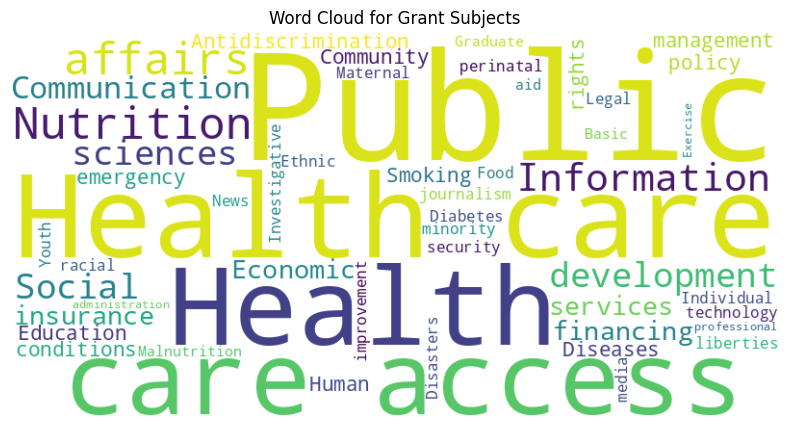

In [6]:
# Importing the WordCloud library
from wordcloud import WordCloud

# Concatenating all the grant subjects into a single text string
grant_subjects_text = ' '.join(grant_data_df['grant_subject_tran'].str.replace(';', ' '))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(grant_subjects_text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Grant Subjects')
plt.show()

# Break out the grant subjects - we must split and explode the data in this field as all the entries are separated by semicolons

In [7]:
import plotly.express as px

# Splitting the grant_subject_tran by semicolons and exploding into separate rows
subject_data = grant_data_df.assign(grant_subject_tran=grant_data_df['grant_subject_tran'].str.split(';')).explode('grant_subject_tran')
subject_summary = subject_data.groupby('grant_subject_tran')['amount_usd'].sum().reset_index()

# Plotting the interactive bar chart
fig_subject = px.bar(subject_summary, x='grant_subject_tran', y='amount_usd', title='Grants by Subject')
fig_subject.show()

# Examine the funder type to dollar relationship

In [8]:
type_summary = grant_data_df.groupby('funder_type')['amount_usd'].sum().reset_index()

# Plotting the interactive bar chart
fig_type = px.bar(type_summary, x='funder_type', y='amount_usd', title='Grants by Funder Type')
fig_type.show()

# Examine population to dollar relationship

In [9]:
# Splitting and exploding the grant_population_tran
population_data = grant_data_df.assign(grant_population_tran=grant_data_df['grant_population_tran'].str.split(';')).explode('grant_population_tran')
population_summary = population_data.groupby('grant_population_tran')['amount_usd'].sum().reset_index()

# Plotting the interactive bar chart
fig_population = px.bar(population_summary, x='grant_population_tran', y='amount_usd', title='Grants by Population')
fig_population.show()

# Examine the grant strategy to dollar relationship

In [10]:
# Splitting and exploding the grant_strategy_tran
strategy_data = grant_data_df.assign(grant_strategy_tran=grant_data_df['grant_strategy_tran'].str.split(';')).explode('grant_strategy_tran')
strategy_summary = strategy_data.groupby('grant_strategy_tran')['amount_usd'].sum().reset_index()

# Plotting the interactive bar chart
fig_strategy = px.bar(strategy_summary, x='grant_strategy_tran', y='amount_usd', title='Grants by Strategy')
fig_strategy.show()

# Examine the recipient to dollar relationship

In [11]:
# Plotting the interactive bar chart for recipients
fig_recipients = px.bar(grant_data_df, x='recip_name', y='amount_usd', title='Grants Awarded to Recipients')
fig_recipients.show()

# Build a heatmap to look at the strategy and population relationship to dollars

In [12]:
# Splitting and exploding both grant_strategy_tran and grant_population_tran
strategy_population_data = grant_data_df.assign(
    grant_strategy_tran=grant_data_df['grant_strategy_tran'].str.split(';'),
    grant_population_tran=grant_data_df['grant_population_tran'].str.split(';')
).explode('grant_strategy_tran').explode('grant_population_tran')

# Grouping the data by strategy and population and summing the amounts
heatmap_data = strategy_population_data.groupby(['grant_strategy_tran', 'grant_population_tran'])['amount_usd'].sum().reset_index()

# Creating a pivot table for the heatmap
heatmap_pivot_table = heatmap_data.pivot(index='grant_strategy_tran', columns='grant_population_tran', values='amount_usd').fillna(0)

# Plotting the heatmap using Plotly Express
fig_heatmap = px.imshow(heatmap_pivot_table, title='Heatmap of Strategy by Population by Dollars')
fig_heatmap.update_layout(width=800, height=600)
fig_heatmap.show()

# -- NOTE-- This Cell Is Disabled. If the data set contains more than one state or awarder zipcode you can activate it --NOTE--

Here we will use ML model to detect the data features that correlate most to the grant amount

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import LabelEncoder
#import seaborn as sns

# Encoding categorical features
#le = LabelEncoder()
#encoded_data = strategy_population_data.copy()
#for col in encoded_data.columns:
#    if encoded_data[col].dtype == 'object':
#        encoded_data[col] = le.fit_transform(encoded_data[col])

# Splitting features and target
#X = encoded_data.drop(columns=['amount_usd'])
#y = encoded_data['amount_usd']

# Fitting Random Forest model
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model.fit(X, y)

# Plotting feature importance
#feature_importance = model.feature_importances_
#sorted_idx = feature_importance.argsort()
#plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
#plt.xlabel('Feature Importance')
#plt.title('Random Forest Feature Importance')
#plt.show()

# This is the ML correlation model for data sets within a single state / zipcode

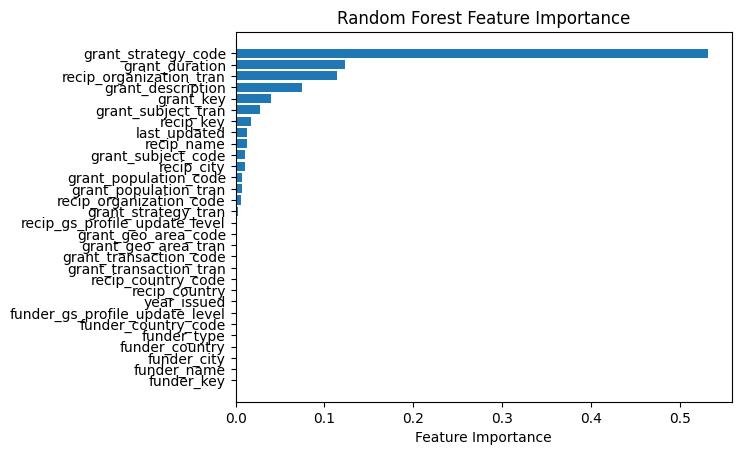

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Copying the exploded data
encoded_data = strategy_population_data.copy()

# Dropping unwanted columns
columns_to_drop = ['funder_state', 'recip_state', 'funder_zipcode', 'funder_profile_url', 'funder_ein', 'recip_zipcode', 'recip_gs_profile_link', 'recip_ein']
encoded_data.drop(columns=columns_to_drop, inplace=True)

# Encoding remaining categorical features
le = LabelEncoder()
for col in encoded_data.columns:
    if encoded_data[col].dtype == 'object':
        encoded_data[col] = le.fit_transform(encoded_data[col])

# Splitting features and target
X = encoded_data.drop(columns=['amount_usd'])
y = encoded_data['amount_usd']

# Fitting Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Plotting feature importance
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# We can observe from the Random Forest Feature Importance chart the features with strong correlations to the amount of money granted

Scatterplot the Amount and Duration

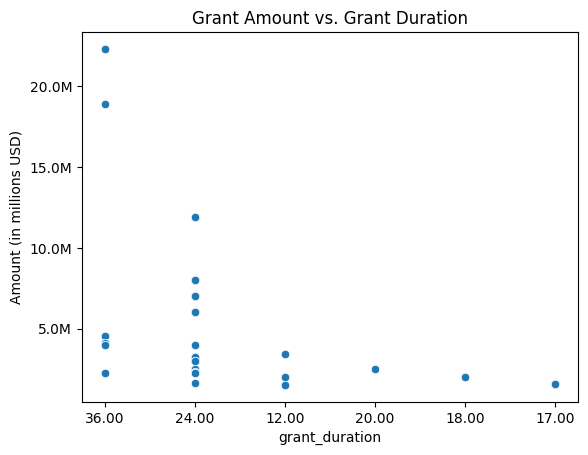

In [15]:
import matplotlib.ticker as ticker

# Scatter plot for grant amount vs. grant duration
sns.scatterplot(x='grant_duration', y='amount_usd', data=strategy_population_data)
plt.title('Grant Amount vs. Grant Duration')
plt.ylabel('Amount (in millions USD)')

# Format the y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6}M'))
plt.show()

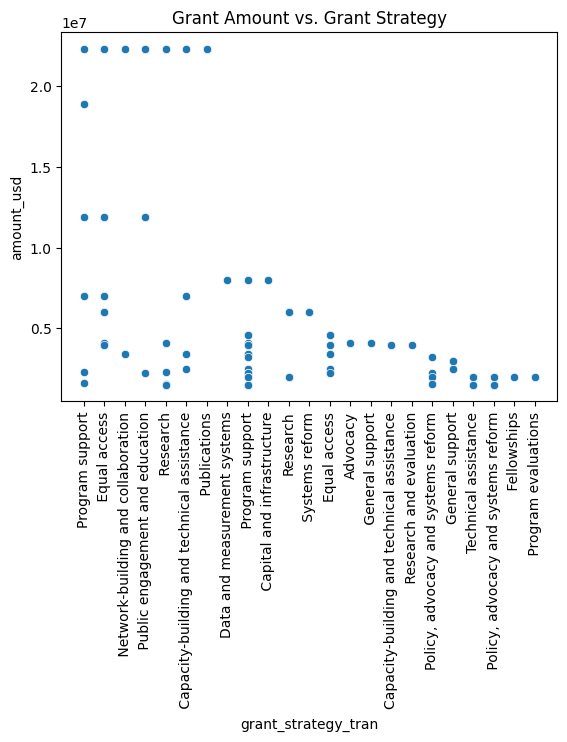

In [16]:
# Scatter plot for grant amount vs. grant strategy
sns.scatterplot(x='grant_strategy_tran', y='amount_usd', data=strategy_population_data)
plt.title('Grant Amount vs. Grant Strategy')
plt.xticks(rotation=90)
plt.show()


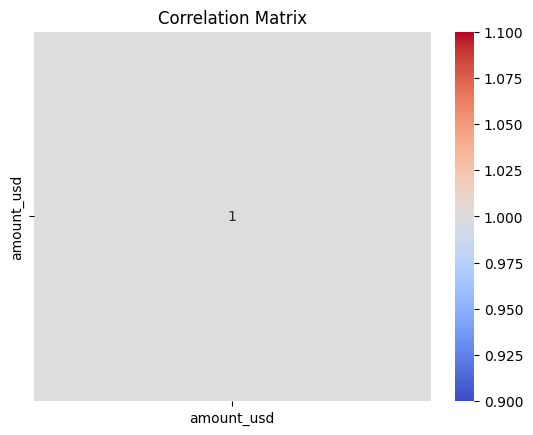

In [17]:
# Correlation matrix
correlation_matrix = strategy_population_data.select_dtypes(include=['float64', 'int64']).corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Lets use natural language processing and look inside the grant descriptions

Load the tools

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

Preprocess the descriptions

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# Function to preprocess text
def preprocess_text(text):
    if text is None:
        return ''

    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(["public", "health"])  # Add specific words to be removed
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the grant descriptions
strategy_population_data['processed_description'] = strategy_population_data['grant_description'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Word frequency analysis

In [20]:
# Count the frequency of words in the processed descriptions
word_freq = Counter()
strategy_population_data['processed_description'].str.split().apply(word_freq.update)

# Top 10 most common words
top_words = word_freq.most_common(10)
print(top_words)

[('equity', 47), ('support', 35), ('data', 27), ('1', 23), ('2', 23), ('rankings', 21), ('chrr', 21), ('improve', 21), ('work', 18), ('community', 18)]


Topic Modeling

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the preprocessed descriptions
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(strategy_population_data['processed_description'])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda_model.fit(data_vectorized)

# Print the top words for each topic
for index, topic in enumerate(lda_model.components_):
    print(f"Top 10 words for Topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

Top 10 words for Topic #0
['pivotal', 'birth', 'racism', 'focused', 'healthcare', 'black', 'legal', 'equity', 'provide', 'support']


Top 10 words for Topic #1
['national', 'notah', 'iii', 'begay', 'foundation', 'operating', '20232025', 'general', 'support', 'provide']


Top 10 words for Topic #2
['efforts', 'provide', 'strategy', 'advance', 'equity', 'measures', 'data', 'improve', 'dashboard', 'city']


Top 10 words for Topic #3
['policy', 'development', 'project', 'determinants', 'county', 'communications', 'equity', 'data', 'rankings', 'chrr']


Top 10 words for Topic #4
['professionals', 'dignity', 'building', 'multidisciplinary', 'advance', 'healthcare', 'work', 'equity', 'community', 'support']




# --WARNING-- ALPHA FEATURES BELOW --WARNING--

Use BERT and Transformers to analyze the text to mine the strongest correlations from words in grant descriptions and then build word clouds from them.  

In [ ]:
!pip install sentence_transformers #Only run this on a GPU-connected instance and not on apple hardware. For example run on a Colab T4

In [25]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Load pre-trained BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Filter out None or missing values in grant_description
filtered_descriptions = strategy_population_data['grant_description'].dropna().values

# Embed grant descriptions
embeddings = model.encode(filtered_descriptions)

# Perform clustering
kmeans = KMeans(n_clusters=5)  # 5 clusters, adjust based on your data
labels = kmeans.fit_predict(embeddings)

# Add cluster labels to the DataFrame (only for non-missing descriptions)
strategy_population_data.loc[strategy_population_data['grant_description'].notna(), 'cluster_label'] = labels

# Explore clusters
for cluster_num in range(5):
    print(f"Cluster #{cluster_num}:")
    print(strategy_population_data[strategy_population_data['cluster_label'] == cluster_num]['grant_description'].head())
    print("\n")


Cluster #0:
1     To provide funds to Community Catalyst to serv...
4     To (1) provide legal guidance, including legal...
4     To (1) provide legal guidance, including legal...
4     To (1) provide legal guidance, including legal...
10    To support a group of multidisciplinary activi...
Name: grant_description, dtype: object


Cluster #1:
2    To (1) protect and expand access to Medicaid a...
2    To (1) protect and expand access to Medicaid a...
2    To (1) protect and expand access to Medicaid a...
5    To continue the development of actionable rese...
5    To continue the development of actionable rese...
Name: grant_description, dtype: object


Cluster #2:
0    To support (1) the production of three annual ...
0    To support (1) the production of three annual ...
0    To support (1) the production of three annual ...
0    To support (1) the production of three annual ...
0    To support (1) the production of three annual ...
Name: grant_description, dtype: object


Cluster #3:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Length mismatch between embeddings and grant type data. Grant type information will not be included in the plot.


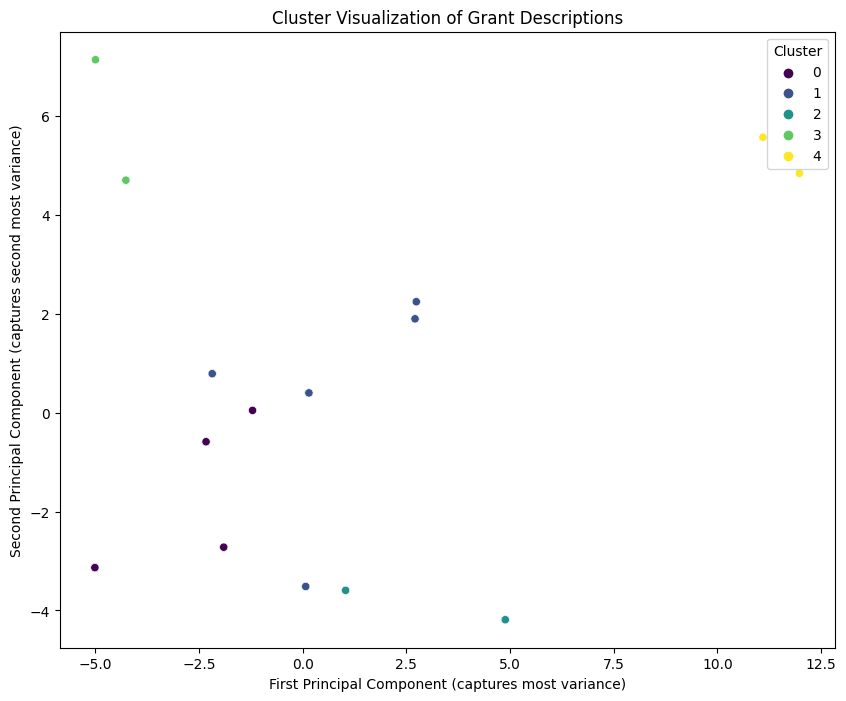

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have embeddings and labels from clustering
# embeddings: The embeddings for your grant descriptions
# labels: The cluster labels corresponding to the embeddings

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(embeddings_2d, columns=['Principal Component 1', 'Principal Component 2'])

# Add the cluster labels
visualization_df['Cluster'] = labels

# If 'grant_type' is in 'strategy_population_data', align it with the embeddings
if embeddings.shape[0] == strategy_population_data.shape[0]:
    visualization_df['Grant Type'] = strategy_population_data['grant_type'].values
else:
    # Handle the case where lengths don't match
    print("Length mismatch between embeddings and grant type data. Grant type information will not be included in the plot.")

# Plot the 2D points colored by cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(data=visualization_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis')
plt.title('Cluster Visualization of Grant Descriptions')
plt.xlabel('First Principal Component (captures most variance)')
plt.ylabel('Second Principal Component (captures second most variance)')
plt.show()


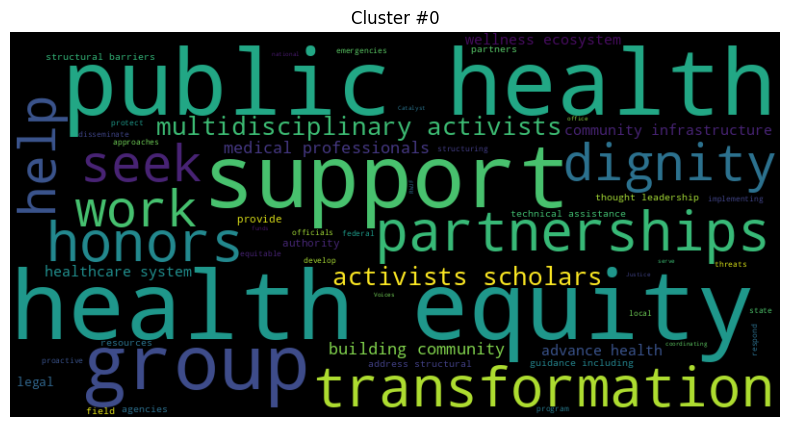

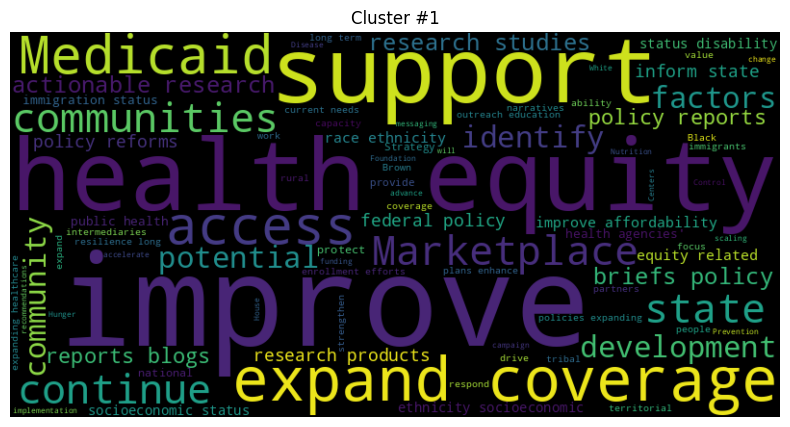

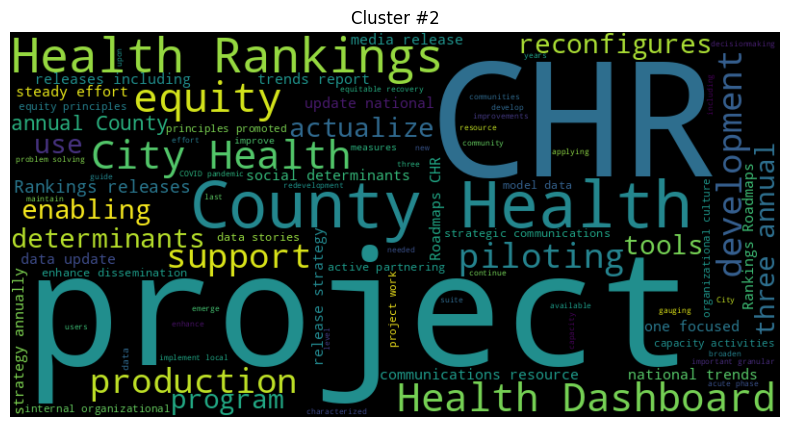

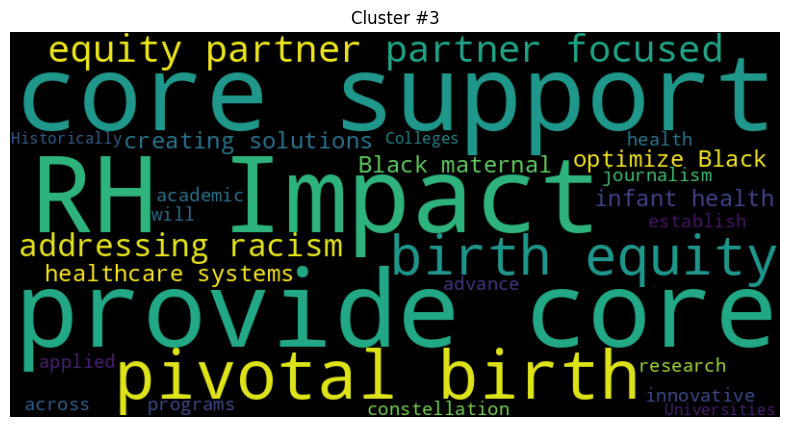

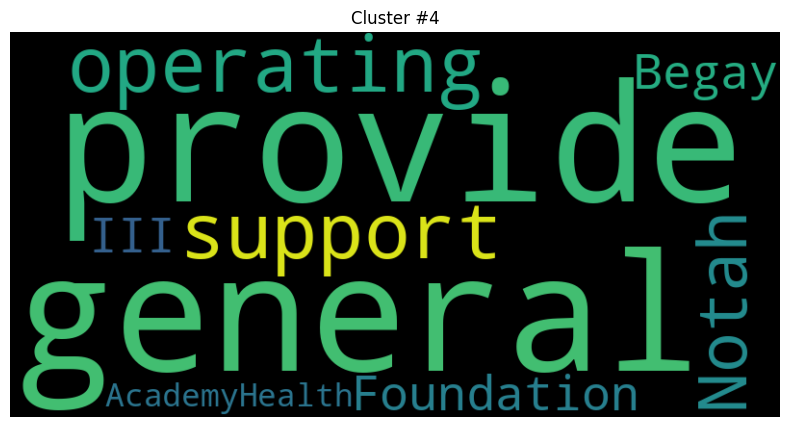

In [27]:
from wordcloud import WordCloud

# Create word clouds for each cluster
for cluster_num in range(5):
    cluster_text = ' '.join(strategy_population_data[strategy_population_data['cluster_label'] == cluster_num]['grant_description'])
    wordcloud = WordCloud(width=800, height=400).generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster #{cluster_num}')
    plt.show()
